In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("data_cleaned.csv")
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.531137,2.464751,4.000000,2.806495,3.000000,2.751185,2.634538,2.900757,2.699125,2.906070,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.537720,2.471333,1.500000,2.809467,2.844302,2.754097,2.637355,2.902445,2.701536,2.907452,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.640666,2.574498,3.131971,2.909512,2.943809,2.853692,2.736682,3.000671,2.800051,3.004852,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.476686,2.412456,2.000000,2.745456,3.000000,2.691836,2.575730,2.839953,2.640844,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.389385,2.326110,3.500000,2.657135,0.500000,2.604037,0.500000,1.000000,2.553916,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,3.012475,2.997849,3.158353,3.039100,3.500000,3.050289,2.987122,3.089079,3.025997,3.074744,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.431464,3.312056,4.000000,4.000000,2.500000,3.363354,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,3.007248,2.992744,3.153440,3.034333,3.033142,3.044939,2.981893,3.500000,3.021248,3.070068,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,3.077890,3.062803,3.222826,3.103411,3.101700,3.112978,3.049472,3.151022,3.087521,3.135828,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
df.columns[401:]

Index(['I enjoy rollercoasters ', 'Have you ever bungee-jumped?',
       'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?', 'Is talkative',
       'Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is original/comes up with ne

In [5]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'user_id'}, inplace=True)

In [6]:
df.iloc[0,:400].index

Index(['user_id', 'The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)',
       ...
       'My Father and My Son (2005)', 'X-Men 2 (2003)',
       'The Usual Suspects (1995)', 'The Mask (1994)', 'Jaws (1975)',
       'Harry Potter and the Chamber of Secrets (2002)', 'Patton (1970)',
       'Anaconda (1997)', 'Twister (1996)', 'MacArthur (1977)'],
      dtype='object', length=400)

In [7]:
df.iloc[1093]

user_id                                                                    1093.000000
The Life of David Gale (2003)                                                 3.000000
Wing Commander (1999)                                                         4.000000
Django Unchained (2012)                                                       3.431464
Alien (1979)                                                                  3.312056
                                                                              ...     
Movies change my position on social economic or political issues              6.000000
When watching movies things get so intense that I have to stop watching       5.000000
Gender identity (1 = female; 2 = male; 3 = self-described)                    1.000000
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0.000000
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0.000000
Name: 1093, Length: 478, dtype: float64

In [8]:
df[['The Life of David Gale (2003)']]

,The Life of David Gale (2003)
0,2.531137
1,2.537720
2,2.640666
3,2.476686
4,2.389385
...,...
1092,3.012475
1093,3.000000
1094,3.007248
1095,3.077890


## Q1

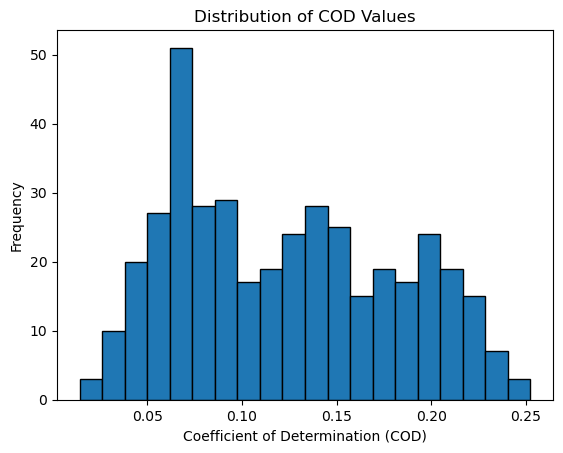

                      Movie ID             Best Predictor       COD
208                I.Q. (1994)     Erik the Viking (1989)  0.672159
203     Erik the Viking (1989)                I.Q. (1994)  0.672159
287  The Straight Story (1999)               Congo (1995)  0.663001
282               Congo (1995)  The Straight Story (1999)  0.663001
377         The Lookout (2007)              Patton (1970)  0.645374
395              Patton (1970)         The Lookout (2007)  0.645374
300                 Ran (1985)       Heavy Traffic (1973)  0.641827
309       Heavy Traffic (1973)                 Ran (1985)  0.641827
369   The Station Agent (2003)             Ed Wood (1994)  0.637398
326             Ed Wood (1994)   The Station Agent (2003)  0.637398
                           Movie ID  \
80                    Avatar (2009)   
95              Interstellar (2014)   
319               La La Land (2016)   
9                 Black Swan (2010)   
190   The Cabin in the Woods (2012)   
248              G

In [9]:


# Assuming you have a DataFrame 'df' with columns: 'movie_id', 'user_id', 'rating'

# Placeholder for storing COD values
cod_values = []

# Placeholder for storing the best predictor for each movie
best_predictors = []

# Iterate over each movie
for movie in df.columns[1:401].unique():
    # Select data for the current movie
    current_movie_data = df[[movie]]

    # Placeholder for storing COD values for the current movie
    movie_cod_values = []

    # Placeholder for storing best predictor for the current movie
    best_predictor = None
    best_cod = 0

    # Iterate over all other movies to build 399 models
    for other_movie in df.columns[1:401].unique():
        if other_movie != movie:
            # Select data for the other movie
            other_movie_data = df[[other_movie]]

            # Extract X and y
            X = other_movie_data
            y = current_movie_data

            # Fit a linear regression model
            model = LinearRegression()
            model.fit(X, y)

            # Predict ratings
            predictions = model.predict(X)

            # Calculate COD
            cod = r2_score(y, predictions)

            # Check if this model is the best predictor
            if cod > best_cod:
                best_cod = cod
                best_predictor = other_movie

            movie_cod_values.append(cod)

    # Calculate the average COD for the current movie
    avg_cod = sum(movie_cod_values) / len(movie_cod_values)
    cod_values.append(avg_cod)

    # Store the best predictor for the current movie
    best_predictors.append((movie, best_predictor, best_cod))

# Plot histogram
plt.hist(cod_values, bins=20, edgecolor='black')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.title('Distribution of COD Values')
plt.show()

# Display the table of best and worst predictors
best_predictors_df = pd.DataFrame(best_predictors, columns=['Movie ID', 'Best Predictor', 'COD'])
print(best_predictors_df.sort_values(by='COD', ascending=False).head(10))
print(best_predictors_df.sort_values(by='COD').head(10))


In [10]:
# np.array(best_predictors_df['COD'])

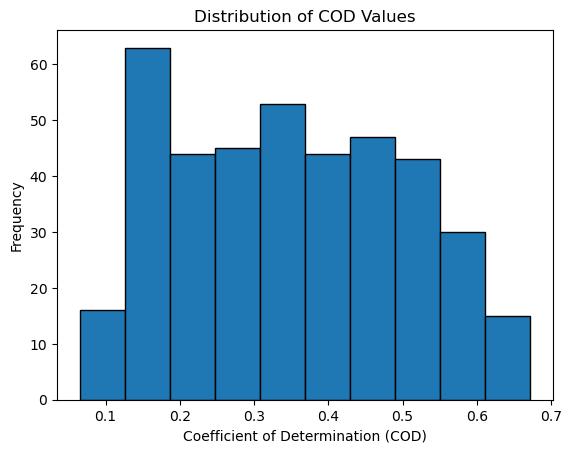

In [13]:
import numpy as np
plt.hist(np.array(best_predictors_df['COD']), edgecolor='black')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.title('Distribution of COD Values')
plt.show()

The average of the best COD was,0.34890618513659777
0.346565445573034


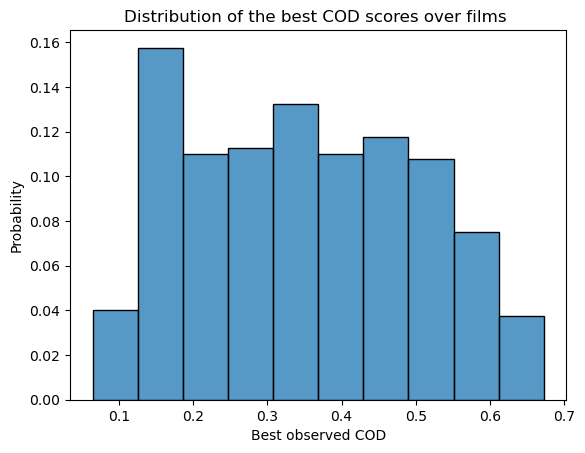

In [16]:
ax=sns.histplot(data=np.array(best_predictors_df['COD']), stat="probability")
ax.set(xlabel="Best observed COD", title="Distribution of the best COD scores over films ")
print("The average of the best COD was,{0}".format(np.mean(np.array(best_predictors_df['COD']))))

print(np.median(np.array(best_predictors_df['COD'])))

In [17]:
pd.concat([best_predictors_df.sort_values(by='COD').head(10), best_predictors_df.sort_values(by='COD', ascending=False).head(10)]).sort_values(by='COD', ascending = False)

,Movie ID,Best Predictor,COD
208,I.Q. (1994),Erik the Viking (1989),0.672159
203,Erik the Viking (1989),I.Q. (1994),0.672159
282,Congo (1995),The Straight Story (1999),0.663001
287,The Straight Story (1999),Congo (1995),0.663001
377,The Lookout (2007),Patton (1970),0.645374
395,Patton (1970),The Lookout (2007),0.645374
300,Ran (1985),Heavy Traffic (1973),0.641827
309,Heavy Traffic (1973),Ran (1985),0.641827
369,The Station Agent (2003),Ed Wood (1994),0.637398
326,Ed Wood (1994),The Station Agent (2003),0.637398


## Q2

Now we'll be focusing on the top and bottom 10 movies and using mutliple regression to analyse further

In [18]:
bottom_10 = best_predictors_df.sort_values(by='COD').head(10)
top_10 = best_predictors_df.sort_values(by='COD', ascending=False).head(10)

In [19]:
bottom_10['Movie ID'].values

array(['Avatar (2009)', 'Interstellar (2014)', 'La La Land (2016)',
       'Black Swan (2010)', 'The Cabin in the Woods (2012)',
       'Grown Ups 2 (2013)', 'Clueless (1995)',
       'The Wolf of Wall Street (2013)', 'Planet of the Apes (2001)',
       'Shutter Island (2010)'], dtype=object)

In [21]:
# vertical_concat 
Q1_rows = pd.concat([top_10, bottom_10], axis=0)

In [22]:
Q1_rows

,Movie ID,Best Predictor,COD
208,I.Q. (1994),Erik the Viking (1989),0.672159
203,Erik the Viking (1989),I.Q. (1994),0.672159
287,The Straight Story (1999),Congo (1995),0.663001
282,Congo (1995),The Straight Story (1999),0.663001
377,The Lookout (2007),Patton (1970),0.645374
395,Patton (1970),The Lookout (2007),0.645374
300,Ran (1985),Heavy Traffic (1973),0.641827
309,Heavy Traffic (1973),Ran (1985),0.641827
369,The Station Agent (2003),Ed Wood (1994),0.637398
326,Ed Wood (1994),The Station Agent (2003),0.637398


In [23]:
additional_predictors = df[['Gender identity (1 = female; 2 = male; 3 = self-described)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]

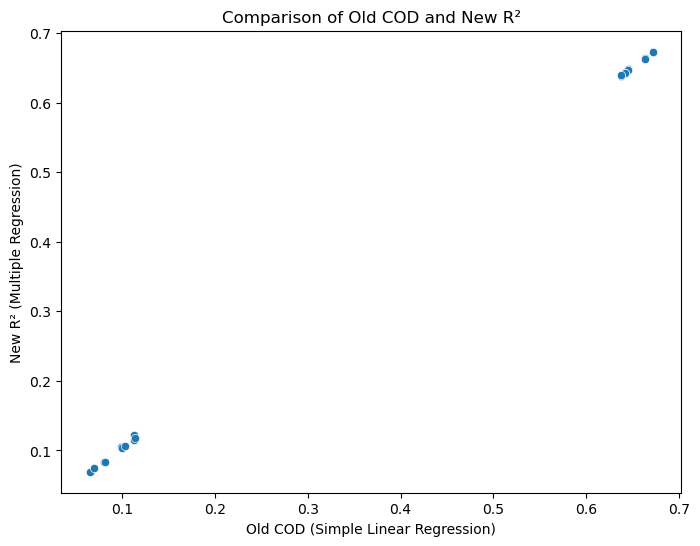

,Movie ID,Best Predictor,R²
0,I.Q. (1994),Erik the Viking (1989),0.672466
1,Erik the Viking (1989),I.Q. (1994),0.673091
2,The Straight Story (1999),Congo (1995),0.663412
3,Congo (1995),The Straight Story (1999),0.663308
4,The Lookout (2007),Patton (1970),0.647571
5,Patton (1970),The Lookout (2007),0.647468
6,Ran (1985),Heavy Traffic (1973),0.642077
7,Heavy Traffic (1973),Ran (1985),0.642676
8,The Station Agent (2003),Ed Wood (1994),0.637733
9,Ed Wood (1994),The Station Agent (2003),0.639238


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'movie_id', 'user_id', 'rating', 'gender_identity', 'sibship_status', 'social_viewing_preferences'

# Placeholder for storing old COD values
old_cod_values = []

# Placeholder for storing new R² values
new_r2_values = []

# Placeholder for storing information about the models
model_info = []

# Iterate over the best and least well-predicted movies
for _, row in Q1_rows.iterrows():
    movie_id = row['Movie ID']
    best_predictor = row['Best Predictor']

    # Select data for the current movie
    current_movie_data = df[[movie_id]]

    # Select data for the best predictor movie
    best_predictor_data = df[[best_predictor]]

    # Merge the two datasets on 'user_id'
    merged_data_ = pd.merge(current_movie_data, best_predictor_data,left_index=True, right_index=True, suffixes=('_current', '_other'))
    merged_data = pd.merge(merged_data_, additional_predictors,left_index=True, right_index=True)

    # Extract X and y
    X_ = merged_data[[best_predictor,'Gender identity (1 = female; 2 = male; 3 = self-described)', 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)', 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]
    y_ = merged_data[movie_id]

    # Fit a multiple regression model
    model = LinearRegression()
    model.fit(X_, y_)

    # Predict ratings
    predictions = model.predict(X_)

    # Calculate R²
    r2 = r2_score(y_, predictions)

    # Store information about the model
    model_info.append({'Movie ID': movie_id, 'Best Predictor': best_predictor, 'R²': r2})

    # Store old COD value
    old_cod_values.append(row['COD'])

    # Store new R² value
    new_r2_values.append(r2)

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=old_cod_values, y=new_r2_values)
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New R² (Multiple Regression)')
plt.title('Comparison of Old COD and New R²')
plt.show()

# Display information about the models
model_info_df = pd.DataFrame(model_info)
(model_info_df)



In [25]:
absolute_change = np.abs((np.array(new_r2_values) - np.array(old_cod_values))/np.array(old_cod_values))*100
absolute_change
# np.array(new_r2_values)
# np.array(old_cod_values)

array([0.04573494, 0.13871858, 0.06203649, 0.04625497, 0.34044143,
       0.32455616, 0.03887335, 0.13228974, 0.05264897, 0.28874786,
       6.85392706, 7.43475204, 2.56539653, 2.00683853, 6.42876029,
       3.18496071, 3.39144986, 8.5489902 , 1.76074611, 3.52887249])

In [ ]:
merged_data

In [ ]:
row

In [ ]:
X_

In [26]:
best_predictors_df

,Movie ID,Best Predictor,COD
0,The Life of David Gale (2003),The King of Marvin Gardens (1972),0.517483
1,Wing Commander (1999),From Hell (2001),0.499569
2,Django Unchained (2012),Inglorious Bastards (2009),0.196874
3,Alien (1979),Aliens (1986),0.249295
4,Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),0.327668
...,...,...,...
395,Patton (1970),The Lookout (2007),0.645374
396,Anaconda (1997),The Lookout (2007),0.201442
397,Twister (1996),Sexy Beast (2000),0.302758
398,MacArthur (1977),Miller's Crossing (1990),0.544177


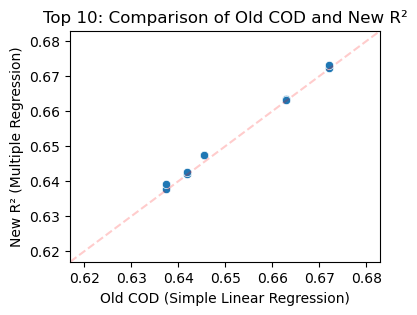

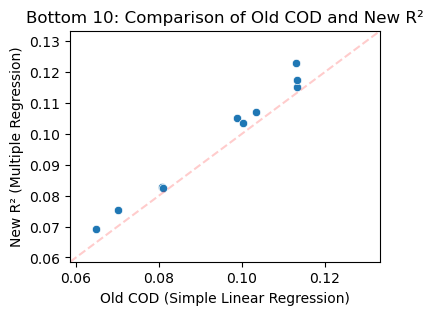

In [27]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x=old_cod_values[:10], y=new_r2_values[:10])
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New R² (Multiple Regression)')
plt.title('Top 10: Comparison of Old COD and New R²')
plt.axline((0.62,0.62),(0.68,0.68), linestyle='--', color='r', alpha=0.2)
plt.show()

plt.figure(figsize=(4, 3))
sns.scatterplot(x=old_cod_values[10:], y=new_r2_values[10:])
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New R² (Multiple Regression)')
plt.title('Bottom 10: Comparison of Old COD and New R²')
plt.axline((0.062,0.062),(0.13,0.13), linestyle='--', color='r', alpha=0.2)
plt.show()

Conclusion from above graphs:
The R2 values for top 10 are pretty much consistent with & without the additional predictors but bottom 10 is doing slightly better in most cases.

## Q3

In [28]:
middle_30 = best_predictors_df.sort_values(by='COD')[250:280]

In [29]:
other_10_movies = best_predictors_df.sort_values(by='COD')[200:210]

In [30]:
other_movie_df = pd.DataFrame()

a = other_10_movies['Movie ID'].values

for i in a:
    other_movie_df.insert(loc=len(other_movie_df.columns),column=i,value=df[i])

In [31]:
other_movie_df

,The Good the Bad and the Ugly (1966),Pirates of the Caribbean: At World's End (2007),Pirates of the Caribbean: The Curse of the Black Pearl (2003),Austin Powers in Goldmember (2002),Austin Powers: The Spy Who Shagged Me (1999),Crossroads (2002),The Talented Mr. Ripley (1999),The Girl Next Door (2004),Requiem for a Dream (2000),Runaway Bride (1999)
0,2.807852,1.000000,2.896842,0.000000,0.000000,2.554640,2.839736,2.620087,2.897665,2.644865
1,2.798788,2.815034,2.887901,2.674589,2.707326,2.549030,2.830549,2.611658,2.887848,2.636967
2,2.869929,2.876537,2.937829,2.726743,2.767476,2.632086,2.901115,2.669800,2.942390,2.685518
3,2.758582,1.000000,3.000000,2.643226,2.672544,2.502989,2.790532,2.577753,2.853765,2.606724
4,2.693107,3.000000,3.000000,0.500000,0.500000,2.429398,2.725307,2.500000,2.801404,3.500000
...,...,...,...,...,...,...,...,...,...,...
1092,3.012756,2.980787,3.023740,2.901783,2.923919,2.954123,3.027527,2.915292,3.021768,2.910908
1093,4.000000,3.500000,3.500000,3.000000,4.000000,4.000000,3.500000,3.239311,4.000000,3.500000
1094,3.012045,3.500000,4.000000,2.903804,2.500000,2.951404,3.026977,2.917448,3.023225,2.913055
1095,3.049290,3.010649,3.047949,2.927127,2.953473,2.998664,3.063736,2.944240,3.048497,2.934290


In [34]:
X_train, X_test, y_train, y_test = train_test_split(other_movie_df, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming df is your DataFrame with the relevant columns
# Select the movies and features
RMSEs = []
alphas = []
cods = []
movie_titles = []

for _, row in middle_30.iterrows():
    movie_id = row['Movie ID']

    selected_movies = df[movie_id].values
    selected_features = other_movie_df
#     selected_features = other_10_movies[['Movie ID']].values

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        selected_features, selected_movies, test_size=0.2, random_state=42 
    )
    # Ridge Regression with Hyperparameter Tuning
    ridge = Ridge()
    alpha_range = np.linspace(0.0001, 120, 400)
    params = {'alpha': alpha_range}  # Adjust these values based on your data
    #cross validating
    ridge_cv = GridSearchCV(ridge, params, cv=5)
    ridge_cv.fit(X_train, y_train)

    # Get the best hyperparameters
    best_alpha = ridge_cv.best_params_['alpha']

    # Train the model with the best hyperparameters
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)

    # Make predictions
    predictions = ridge_model.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    cod = ridge_model.score(X_test, y_test)

    RMSEs.append(rmse)
    alphas.append(best_alpha)
    cods.append(cod)
    movie_titles.append(movie_id)


In [36]:
np.mean(np.array(RMSEs))

0.4205024943468346

In [43]:
np.mean(np.array(alphas))

73.25317178780284

In [44]:
np.mean(np.array(cods))

0.32471445026311574

In [46]:
cods

[0.0377705042033023,
 0.4469673933668028,
 0.5013355271017559,
 0.07390435230059356,
 0.5114975699494352,
 0.4346072357756834,
 0.39007696662331215,
 0.30948255631472166,
 0.2891703649722609,
 0.37822025908424894,
 0.12230209387242952,
 0.3730961682441776,
 0.3426260648783591,
 0.24330648565117607,
 0.408989650954255,
 0.4618331548037843,
 0.3569006033808778,
 0.45288555810217934,
 0.32427312583136814,
 0.09088070420590821,
 0.13295577973611084,
 0.16616869180869964,
 0.13789221123679696,
 0.4267882996500568,
 0.47378587676512773,
 0.4053818488831713,
 0.4614009138400397,
 0.23904611843492174,
 0.45380357268151106,
 0.29408385524040337]

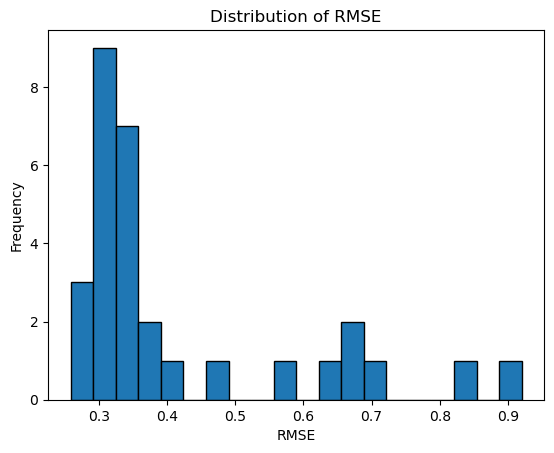

In [47]:
plt.hist(RMSEs, bins=20, edgecolor='black')
plt.title('Distribution of RMSE')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.show()

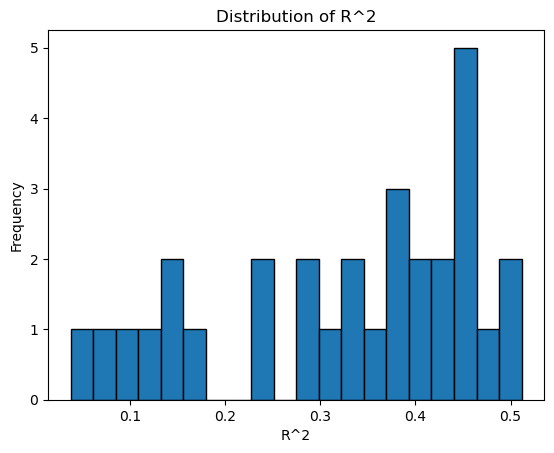

In [48]:
plt.hist(cods, bins=20, edgecolor='black')
plt.title('Distribution of R^2')
plt.xlabel('R^2')
plt.ylabel('Frequency')
plt.show()


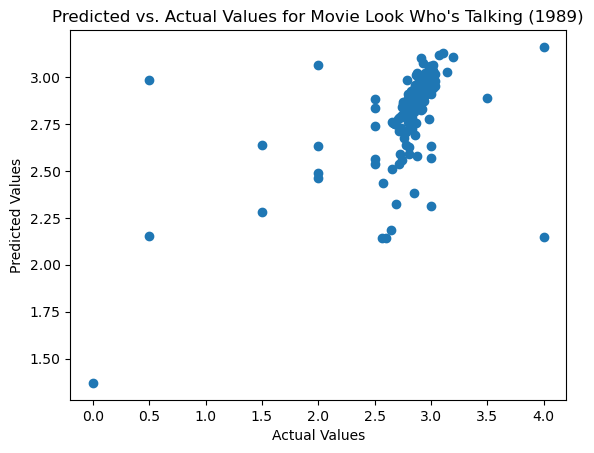

In [49]:
# Choose a specific movie index from your loop
chosen_movie_index = 0

plt.scatter(y_test, predictions)
plt.title(f'Predicted vs. Actual Values for Movie {movie_titles[chosen_movie_index]}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [50]:

pd.DataFrame({"Movie": movie_titles, "RMSE":RMSEs, "best alpha": alphas, "best COD": cods}).sort_values(by="RMSE")


,Movie,RMSE,best alpha,best COD
25,Gigli (2002),0.258266,120.000000,0.405382
24,The Passenger (1975),0.272225,113.082713,0.473786
15,Thoroughly Modern Millie (1967),0.284119,52.932387,0.461833
16,The Village (2004),0.291909,36.992550,0.356901
2,What Women Want (2000),0.291910,39.398563,0.501336
14,Mulholland Dr. (2001),0.297173,40.601570,0.408990
6,Dogville (2003),0.300086,120.000000,0.390077
26,Man on Fire (2004),0.304240,28.270753,0.461401
17,Love Story (1970),0.310074,6.616636,0.452886
5,Let the Right One In (2008),0.310709,46.917354,0.434607


## Q4

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame with the relevant columns
# Select the movies and features
RMSEs = []
alphas = []
cods = []
movie_titles = []

for _, row in middle_30.iterrows():
    movie_id = row['Movie ID']

    selected_movies = df[movie_id].values
    selected_features = other_movie_df
#     selected_features = other_10_movies[['Movie ID']].values

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        selected_features, selected_movies, test_size=0.2, random_state=42
    )

    # Ridge Regression with Hyperparameter Tuning
    lasso = Lasso()
    alpha_range = np.concatenate((np.linspace(.0001, 2, 200), np.linspace(2, 120, 200)))
    params = {'alpha': alpha_range}  # Adjust these values based on your data
    lasso_cv = GridSearchCV(lasso, params, cv=5)
    lasso_cv.fit(X_train, y_train)

    # Get the best hyperparameters
    best_alpha = lasso_cv.best_params_['alpha']

    # Train the model with the best hyperparameters
    lasso_model = Lasso(alpha=best_alpha)
    lasso_model.fit(X_train, y_train)

    # Make predictions
    predictions = lasso_model.predict(X_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)

    cod = ridge_model.score(X_test, y_test)

    RMSEs.append(rmse)
    alphas.append(best_alpha)
    cods.append(cod)
    movie_titles.append(movie_id)


In [55]:
np.mean(np.array(RMSEs))

0.42326515129120584

In [57]:
np.mean(np.array(alphas))

0.009479765494137354

In [58]:
pd.DataFrame({"Movie": movie_titles, "RMSE":RMSEs, "best alpha": alphas, "best COD": cods}).sort_values(by="RMSE")


,Movie,RMSE,best alpha,best COD
25,Gigli (2002),0.263056,0.020199,0.332654
24,The Passenger (1975),0.272593,0.010150,0.417560
15,Thoroughly Modern Millie (1967),0.286851,0.010150,0.400571
2,What Women Want (2000),0.294896,0.010150,0.402543
6,Dogville (2003),0.295150,0.010150,0.378459
16,The Village (2004),0.299262,0.010150,0.330449
14,Mulholland Dr. (2001),0.299291,0.010150,0.380671
26,Man on Fire (2004),0.307813,0.000100,0.393896
17,Love Story (1970),0.317178,0.010150,0.425186
5,Let the Right One In (2008),0.318115,0.010150,0.387168


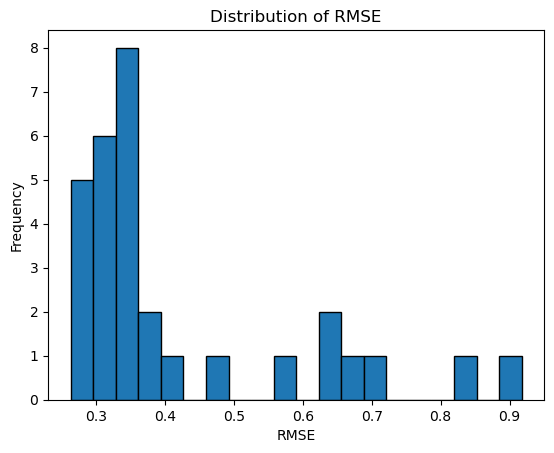

In [53]:
plt.hist(RMSEs, bins=20, edgecolor='black')
plt.title('Distribution of RMSE')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.show()

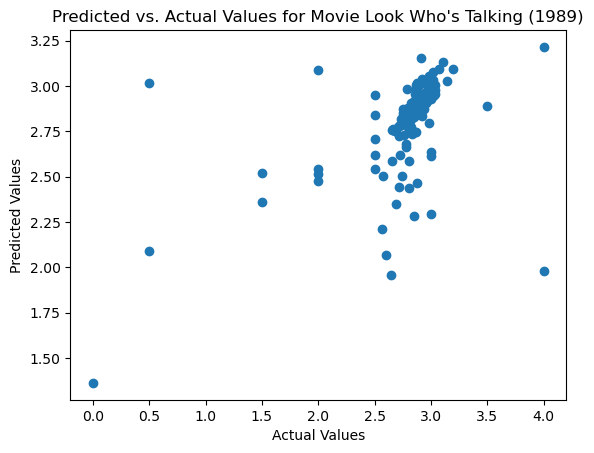

In [54]:
# Choose a specific movie index from your loop
chosen_movie_index = 0

plt.scatter(y_test, predictions)
plt.title(f'Predicted vs. Actual Values for Movie {movie_titles[chosen_movie_index]}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Q5

In [60]:
q5_df = pd.read_csv('movieReplicationSet.csv')
column_indices_to_check = list(range(400))
columns_are_nan = q5_df.iloc[:, column_indices_to_check].isna().all(axis=1)

df[columns_are_nan]


,user_id,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
896,896,0.901033,1.202562,1.57282,1.601375,1.707384,1.800788,1.801895,1.965573,1.947594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1,-1


In [61]:
q5_df = q5_df.drop(896).reset_index(drop=True) 
df = df.drop(896).reset_index(drop=True) 

q5_non_imputed_data = q5_df[q5_df.columns[0:400]]
q5_non_imputed_data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1092,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [62]:
q5_non_imputed_data = q5_non_imputed_data.reindex(q5_non_imputed_data.mean().sort_values().index, axis=1)
middle = len(q5_non_imputed_data.columns)//2
middle_four = q5_non_imputed_data.columns[middle - 2: middle + 2]
middle_four

Index(['Fahrenheit 9/11 (2004)', 'Happy Gilmore (1996)',
       'Diamonds are Forever (1971)', 'Scream (1996)'],
      dtype='object')

In [63]:
median_split = pd.DataFrame()

for m in middle_four:
    median_split[m] = (df[m] <= np.median(df[m])).astype(int)
median_split

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,1,0,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
1091,0,0,0,0
1092,0,0,0,0
1093,0,0,0,0
1094,0,0,0,0


In [64]:
means = np.mean(q5_df, axis=1)
means

0       2.910959
1       2.919192
2       3.120192
3       2.786164
4       2.607692
          ...   
1091    3.204380
1092    3.747696
1093    3.193750
1094    3.334862
1095    3.069149
Length: 1096, dtype: float64

In [66]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize empty lists and arrays to store model information
betas = [[], []]  # Coefficients and intercepts for each model
cod = []  # Area under the ROC curve (AUC) for each model
val = []  # Cross-validated AUC for each model

# Iterate over columns in the 'median_split' DataFrame
for c in range(len(median_split.columns)):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(means, median_split[median_split.columns[c]], test_size=0.2, random_state=42)
    
    # Initialize a logistic regression model
    model = LogisticRegression(random_state=42)
    
    # Reshape the input features to be 2D (required by scikit-learn)
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    
    # Fit the model on the training data
    model.fit(X_train_reshaped, y_train)
    
    # Calculate cross-validated AUC on the training data
    score = np.mean(cross_val_score(model, X_train_reshaped, y_train, cv=5, scoring='roc_auc'))
    
    # Predict probabilities on the test data
    test_probabilities = model.predict_proba(X_test_reshaped)[:, 1]
    
    # Store coefficients and intercepts
    betas[0].append(model.coef_[0][0])
    betas[1].append(model.intercept_[0])
    
    # Calculate ROC curve and AUC on the test data
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Store AUC values
    cod.append(roc_auc)
    val.append(score)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    "Movie": median_split.columns,
    "Validation": val,
    "COD": cod,
    "beta 0": betas[0],
    "Intercept": betas[1]
}).sort_values("COD")

result_df

,Movie,Validation,COD,beta 0,Intercept
3,Scream (1996),0.866589,0.846992,-5.378440,16.454441
0,Fahrenheit 9/11 (2004),0.912990,0.894371,-7.097638,21.657185
1,Happy Gilmore (1996),0.875417,0.895337,-5.522910,16.825975
2,Diamonds are Forever (1971),0.933136,0.924612,-7.554251,23.117915


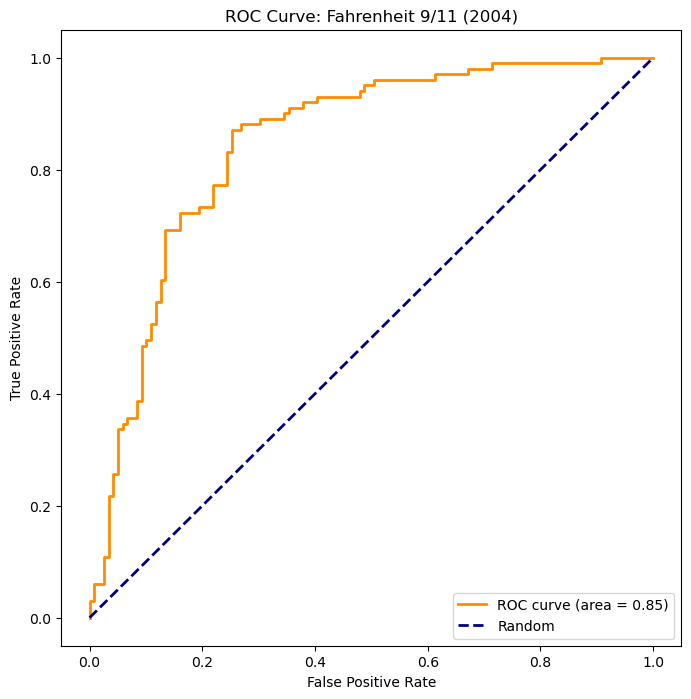

Model Coefficient: -7.097638479237413
Intercept: 21.657185370571767
Validation Score: 0.9129895150565215
ROC: 0.8943714356558393


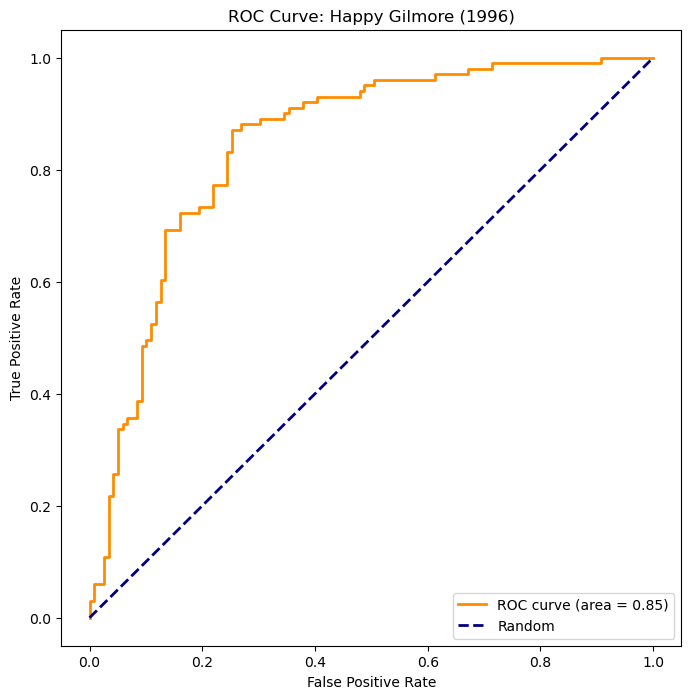

Model Coefficient: -5.522909552235079
Intercept: 16.825974689910304
Validation Score: 0.8754170822646529
ROC: 0.8953373015873016


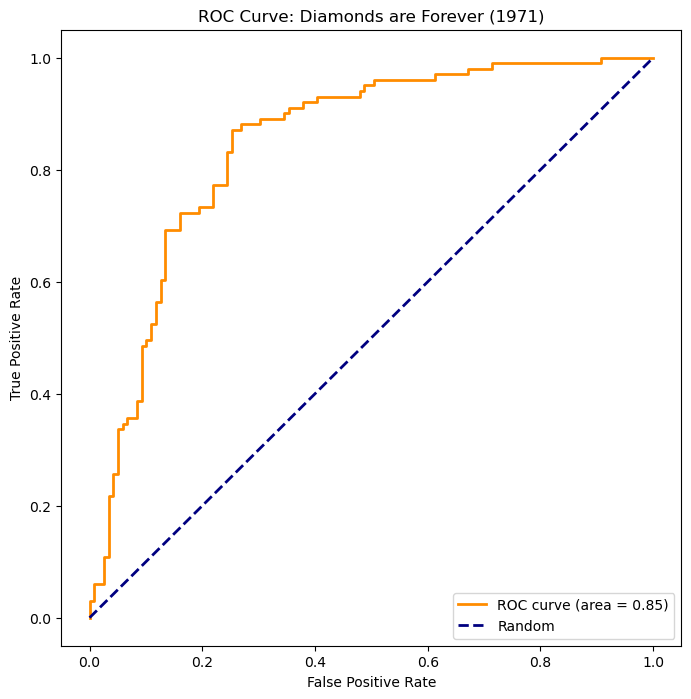

Model Coefficient: -7.5542506006671175
Intercept: 23.117915369944125
Validation Score: 0.9331364563341534
ROC: 0.9246120653887644


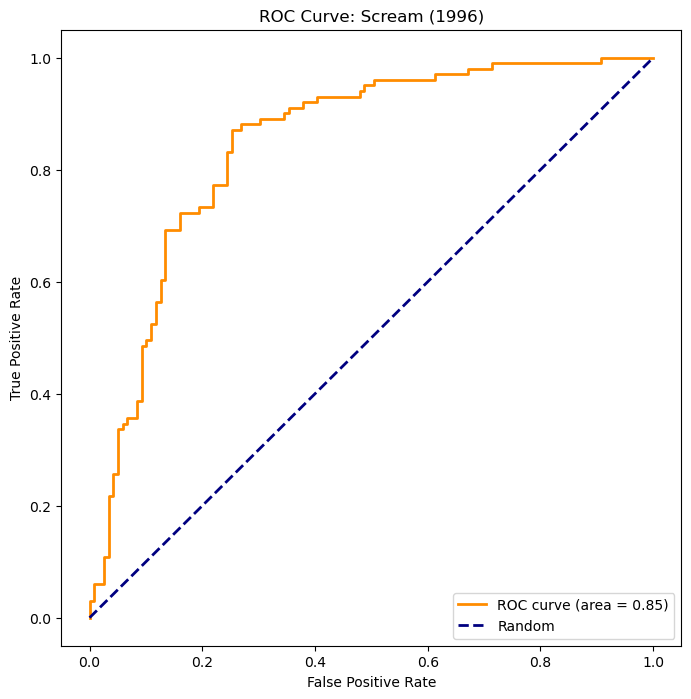

Model Coefficient: -5.378440390250739
Intercept: 16.45444123061269
Validation Score: 0.8665887032454302
ROC: 0.8469922622514352


In [105]:
# Iterate over columns in the 'median_split' DataFrame
for c in range(len(median_split.columns)):
    # Plot ROC curve for each model
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: ' + median_split.columns[c])
    plt.legend(loc='lower right')
    plt.show()
    
    # Print model-specific information
    print("Model Coefficient:", betas[0][c])
    print("Intercept:", betas[1][c])
    print("Validation Score:", val[c])
    print("ROC:", cod[c])


# Extra Credit:


In [79]:
movies_watched_alone_df = df[df["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"].isin([1, 0])]
movies_watched_alone_df

,user_id,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,0,2.531137,2.464751,4.000000,2.806495,3.000000,2.751185,2.634538,2.900757,2.699125,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,1,2.537720,2.471333,1.500000,2.809467,2.844302,2.754097,2.637355,2.902445,2.701536,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2,2.640666,2.574498,3.131971,2.909512,2.943809,2.853692,2.736682,3.000671,2.800051,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,3,2.476686,2.412456,2.000000,2.745456,3.000000,2.691836,2.575730,2.839953,2.640844,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,4,2.389385,2.326110,3.500000,2.657135,0.500000,2.604037,0.500000,1.000000,2.553916,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1092,3.012475,2.997849,3.158353,3.039100,3.500000,3.050289,2.987122,3.089079,3.025997,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1092,1093,3.000000,4.000000,3.431464,3.312056,4.000000,4.000000,2.500000,3.363354,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1093,1094,3.007248,2.992744,3.153440,3.034333,3.033142,3.044939,2.981893,3.500000,3.021248,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1094,1095,3.077890,3.062803,3.222826,3.103411,3.101700,3.112978,3.049472,3.151022,3.087521,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


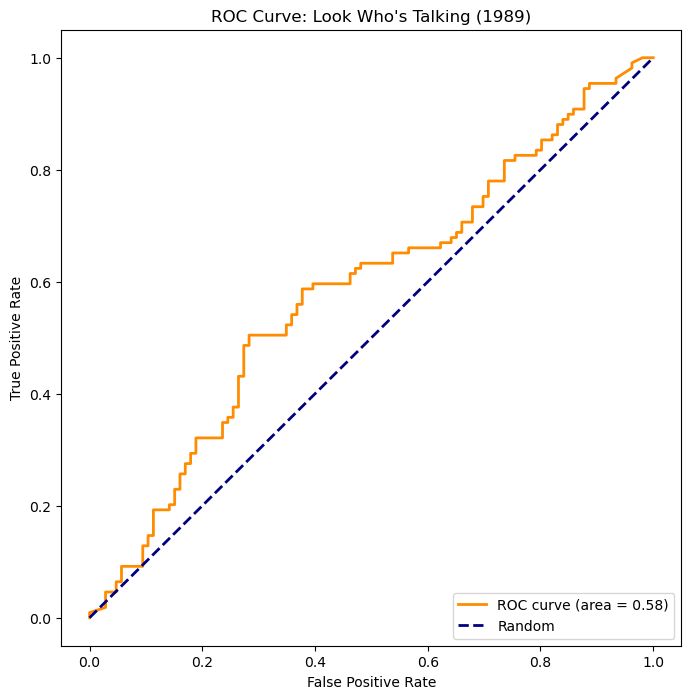

Movie: Look Who's Talking (1989)
Validation Score: 0.5396109174297712
ROC: 0.5836506837458888


In [91]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize empty lists and arrays to store model information

temp = 0
# Iterate over columns in the 'median_split' DataFrame
for c in df.columns[1:401].unique():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(movies_watched_alone_df[c], movies_watched_alone_df["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"], test_size=0.2, random_state=42)
    
    # Initialize a logistic regression model
    model = LogisticRegression(random_state=42)
    
    # Reshape the input features to be 2D (required by scikit-learn)
    X_train_reshaped = X_train.values.reshape(-1, 1)
    X_test_reshaped = X_test.values.reshape(-1, 1)
    
    # Fit the model on the training data
    model.fit(X_train_reshaped, y_train)
    
    # Calculate cross-validated AUC on the training data
    score = np.mean(cross_val_score(model, X_train_reshaped, y_train, cv=5, scoring='roc_auc'))

    
    # Predict probabilities on the test data
    test_probabilities = model.predict_proba(X_test_reshaped)[:, 1]
    
    # Store coefficients and intercepts
    betas[0].append(model.coef_[0][0])
    betas[1].append(model.intercept_[0])
    
    # Calculate ROC curve and AUC on the test data
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
    roc_auc = auc(fpr, tpr)
    if temp < score:
        most_pred_film_index = c
        max_score = score
        max_fpr = fpr
        max_tpr = tpr
        max_roc_auc = roc_auc
    
    # Store AUC values
    cod.append(roc_auc)
    val.append(score)

plt.figure(figsize=(8, 8))
plt.plot(max_fpr, max_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: ' +most_pred_film_index)
plt.legend(loc='lower right')
plt.show()
print("Movie:", most_pred_film_index)
print("Validation Score:", max_score)
print("ROC:", max_roc_auc)
